In [131]:
import numpy as np
import pandas as pd
import tensorflow as tf

loading dataset

In [132]:
data= pd.read_csv("curn.csv")

data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


missing values and duplicates


In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [134]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [135]:
data.isnull().sum() #no null values
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [136]:
data.dropna(inplace=True)

In [137]:
data.duplicated().sum()#no duplicates

np.int64(0)

In [138]:
data.shape

(7043, 21)

 Creating the matrix of features (X) and the dependent variable vector (y)

In [139]:
X = data.iloc[:,1:-1]
y=data.iloc[:,-1]


encoding dependent variable

In [140]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
y=le.fit_transform(y)
y

array([0, 0, 1, ..., 0, 1, 0], shape=(7043,))

In [141]:
print(X.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')


one hot encode catorigorical features in dependent variable

In [142]:
categorical_cols = ["gender","Partner","Dependents","PhoneService","MultipleLines",
                    "InternetService","OnlineSecurity","OnlineBackup","DeviceProtection",
                    "TechSupport","StreamingTV","StreamingMovies",
                    "Contract","PaperlessBilling","PaymentMethod"]

X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.5,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.5,True,True,True,True,False,True,...,False,True,False,True,True,False,True,False,False,True
7039,0,72,103.20,7362.9,False,True,True,True,False,True,...,False,True,False,True,True,False,True,True,False,False
7040,0,11,29.60,346.45,False,True,True,False,True,False,...,False,False,False,False,False,False,True,False,True,False
7041,1,4,74.40,306.6,True,True,False,True,False,True,...,False,False,False,False,False,False,True,False,False,True


In [143]:
# Convert to numeric, forcing errors to NaN
X["TotalCharges"] = pd.to_numeric(X["TotalCharges"], errors="coerce")

# Fill missing values (caused by blank spaces) with median
X["TotalCharges"] = X["TotalCharges"].fillna(X["TotalCharges"].median())

In [144]:
X.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [145]:

X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,True,True,True,True,False,True,...,False,True,False,True,True,False,True,False,False,True
7039,0,72,103.20,7362.90,False,True,True,True,False,True,...,False,True,False,True,True,False,True,True,False,False
7040,0,11,29.60,346.45,False,True,True,False,True,False,...,False,False,False,False,False,False,True,False,True,False
7041,1,4,74.40,306.60,True,True,False,True,False,True,...,False,False,False,False,False,False,True,False,False,True


splitting data in training and testing set

In [146]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [147]:
from sklearn.preprocessing import StandardScaler

num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_test[num_cols] = scaler.transform(X_test[num_cols])


X_test

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
185,0,-1.284605,-1.331629,-1.001554,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
2715,0,0.353238,-1.316672,-0.571859,True,False,False,True,False,True,...,True,False,True,False,False,False,True,False,False,False
3825,0,0.803645,-1.512772,-0.556270,False,True,True,True,False,False,...,True,False,True,False,False,True,False,False,False,True
1807,0,-1.284605,0.381756,-0.978757,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
132,0,1.417836,-0.475768,0.429201,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6366,0,1.294997,0.114195,0.923926,False,True,False,True,False,False,...,False,False,False,True,False,True,True,False,False,True
315,0,0.762699,1.501854,1.502189,True,True,True,True,False,True,...,False,True,False,True,True,False,False,True,False,False
2439,0,-0.629468,-1.494492,-0.866695,True,True,True,True,False,False,...,True,False,True,False,True,False,False,False,False,False
5002,0,1.499728,-0.695134,0.296531,False,True,True,False,True,False,...,False,False,False,True,False,True,True,True,False,False


Building the ANN

In [148]:
#initalizing the ann
ann = tf.keras.models.Sequential()


In [149]:
## Adding input layer and hidden layer 
ann.add(tf.keras.layers.Dense(units=9,activation="relu"))

In [150]:
## adding second hidden layer
ann.add(tf.keras.layers.Dense(units=9,activation="relu"))

In [151]:
## adding the output layer 
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

training the Ann

In [152]:
##compiling the Ann

ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [153]:
## train the ann on training set and predict the test set

ann.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 731us/step - accuracy: 0.7584 - loss: 0.4891
Epoch 2/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - accuracy: 0.7911 - loss: 0.4421
Epoch 3/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - accuracy: 0.7943 - loss: 0.4331
Epoch 4/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - accuracy: 0.7945 - loss: 0.4279
Epoch 5/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7971 - loss: 0.4246
Epoch 6/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - accuracy: 0.7971 - loss: 0.4224
Epoch 7/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.7985 - loss: 0.4204
Epoch 8/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - accuracy: 0.8039 - loss: 0.4196
Epoch 9/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8016 - loss: 0.4179
Epoch 10/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - accuracy: 0.8010 - loss: 0.4172
Epoch 11/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.8037 - loss: 0.4171
Epoch 12/100
177/177 ━━

predict the test results

In [154]:
y_pred=ann.predict(X_test)
y_pred=(y_pred>0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[[1 1]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 1]]


confusion matrix

In [155]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[966  70]
 [195 178]]


0.8119233498935415

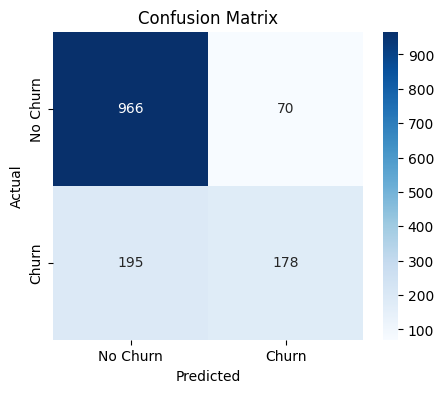

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

# confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn","Churn"], yticklabels=["No Churn","Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [157]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=["No Churn","Churn"]))

              precision    recall  f1-score   support

    No Churn       0.83      0.93      0.88      1036
       Churn       0.72      0.48      0.57       373

    accuracy                           0.81      1409
   macro avg       0.77      0.70      0.73      1409
weighted avg       0.80      0.81      0.80      1409



45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step


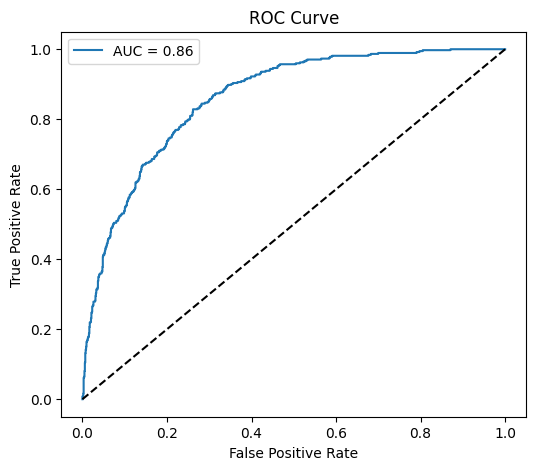

In [158]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = ann.predict(X_test)  # probabilities from ANN

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'k--')  # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()